# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
import json
import requests 

# Building URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Lists to hold reponse info

cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

city_list = []

counter = 0
sets = 1
max_calls = 50

print('Beginning Data Retrieval')
print('-----------------------------')
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(city)
        
        counter += 1
        
        # Set up the max_calls limit with a sets counter
        if counter == max_calls:
            sets += 1
            counter = 1
        
        print(f"Processing Record {counter} of Set {sets} | {city}")
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')    
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | sinnamary
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | cape town
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | berbera
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | nalobikha
City not found. Skipping...
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | pasni
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | orsha
Processing Record 12 of Set 1 | kununurra
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | asau
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | ne

Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | ibra
Processing Record 42 of Set 4 | rabo de peixe
Processing Record 43 of Set 4 | comodoro rivadavia
Processing Record 44 of Set 4 | simplicio mendes
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | winchester
Processing Record 47 of Set 4 | alta floresta
Processing Record 48 of Set 4 | sitka
City not found. Skipping...
Processing Record 49 of Set 4 | jadu
Processing Record 1 of Set 5 | quatre cocos
Processing Record 2 of Set 5 | altay
Processing Record 3 of Set 5 | solnechnyy
Processing Record 4 of Set 5 | oum hadjer
Processing Record 5 of Set 5 | inuvik
Processing Record 6 of Set 5 | labuhan
Processing Record 7 of Set 5 | aksay
Processing Record 8 of Set 5 | visby
Processing Record 9 of Set 5 | bansgaon
Processing Record 10 of Set 5 | mount isa
Processing Record 11 of Set 5 | kaeo
Processing Record 12 of Set 5 | camacha
Processing Record 13 of Set 5 | hay river
Processing Record 14 of S

City not found. Skipping...
Processing Record 31 of Set 8 | bilma
City not found. Skipping...
Processing Record 32 of Set 8 | wajima
Processing Record 33 of Set 8 | machiques
Processing Record 34 of Set 8 | santa marta
Processing Record 35 of Set 8 | belyy yar
Processing Record 36 of Set 8 | mugumu
Processing Record 37 of Set 8 | bam
Processing Record 38 of Set 8 | sarmanovo
Processing Record 39 of Set 8 | phan thiet
Processing Record 40 of Set 8 | narsaq
Processing Record 41 of Set 8 | leninogorsk
Processing Record 42 of Set 8 | lorengau
Processing Record 43 of Set 8 | doksy
Processing Record 44 of Set 8 | ndioum
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | itoman
Processing Record 48 of Set 8 | nikko
Processing Record 49 of Set 8 | karratha
Processing Record 1 of Set 9 | saint-georges
Processing Record 2 of Set 9 | moanda
City not found. Skipping...
Processing Record 3 of Set 9 | acarau
Processing Record 4 of Set 9 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create DataFrame
city_df = pd.DataFrame({
    'City': city_list,
    'Country': country,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date,
    })

# Export the city data into a .csv.
city_df.to_csv('output_data/output_data_cities.csv')

city_df

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,sinnamary,GF,5.38,-52.95,84.45,67,4,9.01,1607964205
1,vaini,TO,-21.20,-175.20,78.80,88,75,10.29,1607964205
2,cape town,ZA,-33.93,18.42,71.01,72,75,12.75,1607964205
3,avarua,CK,-21.21,-159.78,77.00,88,100,4.70,1607964206
4,berbera,SO,10.44,45.01,77.41,58,11,10.25,1607964206
...,...,...,...,...,...,...,...,...,...
548,tambacounda,SN,13.75,-13.76,98.60,12,0,4.70,1607964299
549,saint-joseph,RE,-21.37,55.62,77.00,94,90,17.22,1607964299
550,havre-saint-pierre,CA,50.23,-63.60,28.40,86,90,13.87,1607964299
551,kalianget,ID,-7.05,113.93,80.47,80,100,7.38,1607964300


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_df.sort_values(by=['Humidity'], ascending=False)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
509,aljezur,PT,37.32,-8.80,59.00,100,59,1.01,1607964293
10,orsha,BY,54.52,30.41,30.20,100,90,2.24,1607964207
291,honiara,SB,-9.43,159.95,75.20,100,40,2.77,1607964257
521,zheleznodorozhnyy,RU,55.75,38.00,21.20,100,90,11.18,1607964066
352,kompolt,HU,47.73,20.25,37.99,100,90,1.32,1607964267
...,...,...,...,...,...,...,...,...,...
421,tessalit,ML,20.20,1.01,75.65,15,1,4.83,1607964279
199,oum hadjer,TD,13.30,19.70,83.41,14,51,8.99,1607964009
467,atar,MR,20.52,-13.05,83.91,13,78,8.72,1607964287
548,tambacounda,SN,13.75,-13.76,98.60,12,0,4.70,1607964299


In [7]:
#  Get the indices of cities that have humidity over 100%.
 
    # This section was skiped because no cities that have humidity > 100%.

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

    # This section was skiped because no cities that have humidity > 100%.

This section was skiped because no cities that have humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

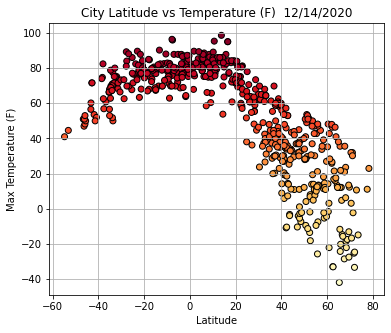

In [9]:
# Create a scatter plot for latitude vs max temperature.
x_values = city_df['Lat']
y_values = city_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values, c=y_values, cmap='YlOrRd', edgecolors = "k", linewidths = 1,)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Temperature (F)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_temperature.png", bbox_inches="tight")
plt.show()

The above Latitute vs Temperute scatter plot comparing the max temperature for each city accross different latitudes shows the correlation that as we move away from the equator (Latitude 0) the temperature drops. However, there is not much of a drop moving south of the equator from 0 degrees latitude to around -60 degrees latitude.

## Latitude vs. Humidity Plot

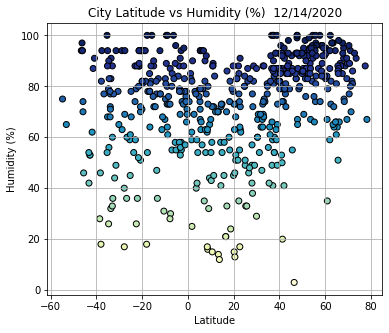

In [10]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity (%)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

The above Latitute vs Humidity scatter plot shows that there is not a strong correlation between latitude and Humidity levels. 

## Latitude vs. Cloudiness Plot

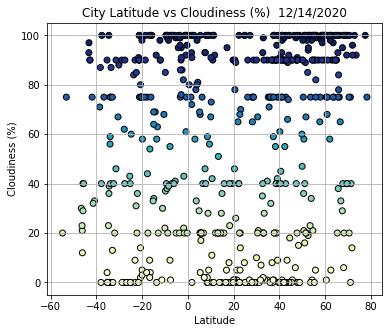

In [11]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness (%)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

The above Latitute vs Cloudiness scatter plot shows that there is not a strong correlation between latitude and cloudiness, but rather demonstrate the consistency of cloudiness percentage at certain values, notably 0%, 20%, 40%, 75%, 90% and 100%.

## Latitude vs. Wind Speed Plot

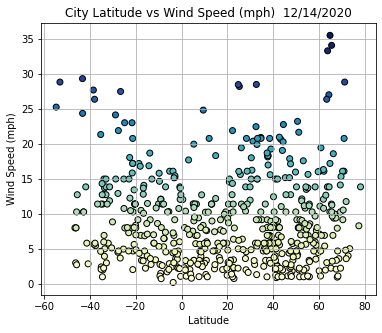

In [12]:
# Create a scatter plot for latitude vs humidity.
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(6,5))
plt.scatter(x_values, y_values,c=y_values, cmap='YlGnBu', edgecolors = "k", linewidths = 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed (mph)  {time.strftime("%m/%d/%Y")}')
plt.grid()
plt.savefig("Images/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The above Latitute vs Wind Speed scatter plot shows little to no correlation between latitude and wind spped. However, the plot shows that it seems rare for wind speeds to rise above 20 mph.

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_df.loc[city_df['Lat'] >= 0]
southern_df = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8365960897485845
The correlation between both factors is -0.84


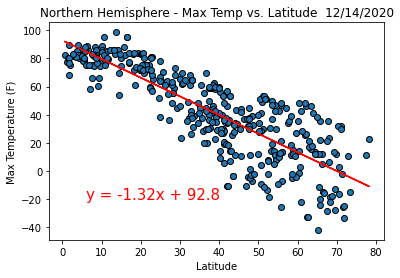

In [14]:
# Create a scatter plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_max_temp_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a strong, negative correlation between Maximum temperature and latitude with a high correlation coefficient (value shown in the graph). These means that farther away from the equater(latitude 0) the maximum Temperature (F) will decrease. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6433181109121551
The correlation between both factors is 0.64


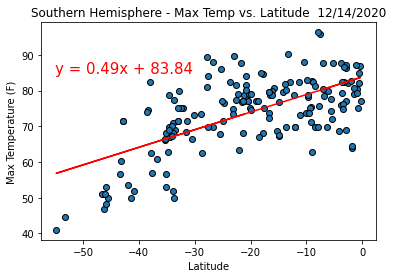

In [15]:
# Create a scatter plot for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Max Temperature (F)')
plt.title(f'Southern Hemisphere - Max Temp vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_max_temp_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a lower correlation between Maximum Temperature and latitude in the Southern Hemisphere compare to the Northern Hemisphere. Less that 50% of the data fit the model and the correlation coefficient (value shown in the graph)is low.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4409612091463408
The correlation between both factors is 0.44


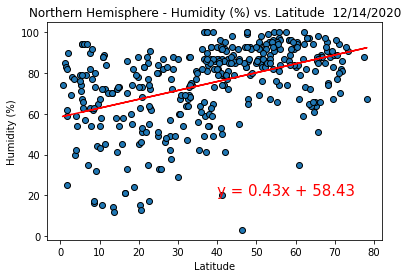

In [16]:
# Create a scatter plot for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Northern Hemisphere - Humidity (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_humidity_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between humidity and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11636217908117565
The correlation between both factors is 0.12


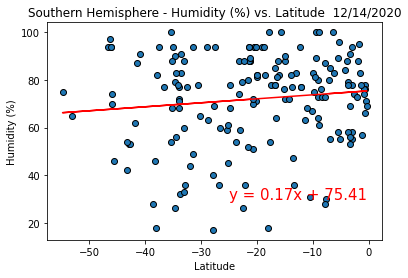

In [17]:
# Create a scatter plot for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Humidity (%)')
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_humidity_vs_lat_lin_regression.png')
plt.show()

The result from the data showed the same conclusions as the Northern hemisphere (above) for the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2846583790922651
The correlation between both factors is 0.28


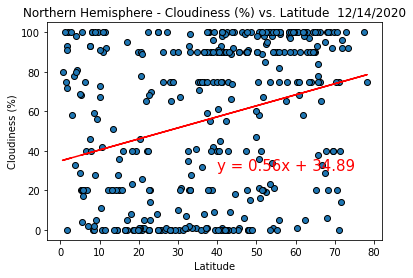

In [18]:
# Create a scatter plot for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Northern Hemisphere - Cloudiness (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_cloudiness_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between cloudiness and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28328993760978227
The correlation between both factors is 0.28


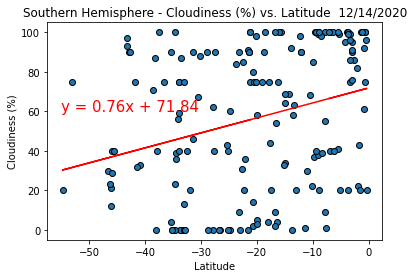

In [19]:
# Create a scatter plot for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f'Cloudiness (%)')
plt.title(f'Southern Hemisphere - Cloudiness (%) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_cloudiness_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between cloudiness and latitude in the Southern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13658977871024536
The correlation between both factors is 0.14


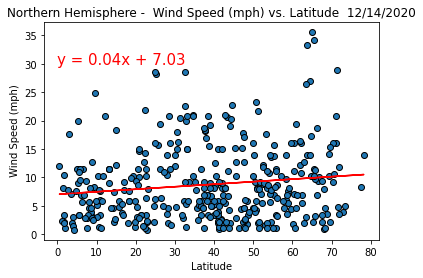

In [22]:
# Create a scatter plot for Northern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f' Wind Speed (mph)')
plt.title(f'Northern Hemisphere -  Wind Speed (mph) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/northern_wind_speed_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between  wind speed and latitude in the Northern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2687443936723789
The correlation between both factors is -0.27


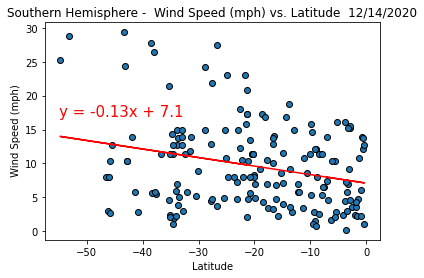

In [23]:
# Create a scatter plot for Southern Hemisphere -  Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolors = "k",linewidths = 1)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(f' Wind Speed (mph)')
plt.title(f'Southern Hemisphere -  Wind Speed (mph) vs. Latitude  {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue}")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Images/southern_wind_speed_vs_lat_lin_regression.png')
plt.show()

The result from the data showed that there is a low correlation between wind speed and latitude in the Southern hemisphere. the data is very wide distributed and the values of r-quare and correlation coefficient (values shown in the graph) support that the model is very poor.